In [1]:
import sys
import os
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],                    # use latex default serif font
    "font.size": "22",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# plt.rc('text', usetex=True)


FONT=18

sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 1.5, "axes.labelsize":FONT, "axes.titlesize":FONT, "legend.fontsize":FONT, "xtick.labelsize":FONT, "ytick.labelsize":FONT, "font.size":FONT})


sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-', 'lines.linewidth':2.5})
# sns.set_palette("dark")

mpl.pyplot.close("all")


tasks = ["STAGEIN_TIME_S", "RESAMPLE_TIME_S", "COMBINE_TIME_S", "MAKESPAN_S"]
## Global directory that contains traces
DIR="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/swarp/"


/usr/local/opt/python/bin/python3.7


In [2]:

## Cori data
#csv_file_cori = DIR+"/"+"shared-cori/bb_runs2020-32c.csv" -> old one used in Europar
csv_file_cori = DIR+"/"+"shared-cori/bb-runs2020-32c.csv"
## Summit Data
#csv_file_summit = DIR+"/"+"private-summit/runs-input-files-32c-1w.csv"
csv_file_summit = DIR+"/"+"private-summit/second-runs-input-files-32c-1w.csv"
# DIR="/Users/lpottier/research/usc-isi/projects/workflow-io-bb/tools/"
# csv_file = DIR+"/"+"swarp-run-1W-32c-raw.csv"

fig_size_square = (5, 4)
fig_size_rect = (6.5, 4)

In [3]:
CORE="32"
#PLOT_DIR="/Users/lpottier/research/usc-isi/projects/active/paper-workflow-bb/figures/plots/real-swarp"
PLOT_DIR=os.getcwd()
OUTPUT = PLOT_DIR+"/"+"swarp-1w-"+CORE+"c/"

try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")


Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/swarp-1w-32c/  already exists


In [4]:
df_cori = pd.read_csv(csv_file_cori, sep=' ')
df_summit = pd.read_csv(csv_file_summit, sep=' ')

df_swarp = pd.concat([df_cori, df_summit])

df_swarp_priv = df_swarp[df_swarp.BB_TYPE=="PRIVATE"]
df_swarp_strip = df_swarp[df_swarp.BB_TYPE=="STRIPED"]
df_swarp_onnode = df_swarp[df_swarp.BB_TYPE=="ONNODE"]


print(df_summit.BB_NB_FILES.unique())
df_swarp = df_swarp.loc[df_swarp['BB_NB_FILES'].isin([0,8,16,24,32])]
print(df_summit.BB_NB_FILES.unique())

# print(df_cori.head())

[ 0 16 24 32  8]
[ 0 16 24 32  8]


In [5]:
# small_dt = df_swarp[["FITS", "BB_TYPE", "NB_CORES", "BB_NB_FILES","RESAMPLE_TIME_S", "COMBINE_TIME_S"]]
# #small_dt = small_dt.sort_values(by=['NB_PIPELINE'])
# print(small_dt.sort_values(by=['NB_CORES', 'BB_NB_FILES']))

In [6]:
# small_dt = df_swarp[["NB_PIPELINE", "FITS", "BB_NB_FILES" ,"MAKESPAN_S"]]
# #small_dt = small_dt.sort_values(by=['NB_PIPELINE'])
# print(small_dt.sort_values(by=['NB_PIPELINE', 'FITS', "BB_NB_FILES"]))

In [7]:
# small_dt = df_swarp[["FITS", "BB_NB_FILES" ,"RESAMPLE_TIME_S", "COMBINE_TIME_S"]]
# #small_dt = small_dt.sort_values(by=['NB_PIPELINE'])
# print(small_dt.sort_values(by=['BB_NB_FILES']))

In [8]:
#grouped = small_dt.groupby('BB_NB_FILES', sort=True)
#print(grouped.groups)

In [9]:
# plt.figure()
# df_swarp_priv = df_swarp_priv.sort_values(by=['BB_NB_FILES'])
# tmp_df = df_swarp_priv[df_swarp_priv.FITS=="N"]
# plt.errorbar(tmp_df.BB_NB_FILES, tmp_df.RESAMPLE_MEAN_TIME_S, xerr=0, yerr=tmp_df.RESAMPLE_SD_TIME)
# #plt.title("")

# #g = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_MEAN_TIME_S", ci="RESAMPLE_SD_TIME", hue="FITS", style="FITS", markers=True, dashes=True, data=swarp_dt_priv)

In [10]:
#g = sns.lineplot(x="BB_NB_FILES", y="COMBINE_MEAN_TIME_S", hue="FITS", style="FITS", markers=True, dashes=True, data=swarp_dt_priv)

# swarp_dt_priv = swarp_dt_priv.sort_values(by=['BB_NB_FILES'])
# swarp_dt_priv_nofits = swarp_dt_priv[swarp_dt_priv.FITS=="N"]
# swarp_dt_priv_fits = swarp_dt_priv[swarp_dt_priv.FITS=="Y"]


# fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False)
# #plt.axis('scaled')

# ax = axs[0,0]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.MEAN_MAKESPAN_S, yerr=swarp_dt_priv_fits.SD_MAKESPAN, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.MEAN_MAKESPAN_S, yerr=swarp_dt_priv_nofits.SD_MAKESPAN, color="r")

# ax.set_title('MEAN_MAKESPAN_S')

# # With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

# ax.minorticks_on()
# ax.grid()
# ax.set_ylabel('Time (s)')


# ax = axs[0,1]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.STAGEIN_MEAN_TIME_S, yerr=swarp_dt_priv_fits.STAGEIN_SD_TIME, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.STAGEIN_MEAN_TIME_S, yerr=swarp_dt_priv_nofits.STAGEIN_SD_TIME, color="r")
# ax.set_title('STAGEIN_MEAN_TIME_S')

# ax.minorticks_on()
# ax.grid()

# ax = axs[1,0]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.RESAMPLE_MEAN_TIME_S, yerr=swarp_dt_priv_fits.RESAMPLE_SD_TIME, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.RESAMPLE_MEAN_TIME_S, yerr=swarp_dt_priv_nofits.RESAMPLE_SD_TIME, color="r")

# ax.set_title('RESAMPLE_MEAN_TIME_S')

# ax.minorticks_on()
# ax.grid()
# ax.set_xlabel('Number of files in BB')
# ax.set_ylabel('Time (s)')

# ax = axs[1,1]
# ax.errorbar(swarp_dt_priv_fits.BB_NB_FILES, swarp_dt_priv_fits.COMBINE_MEAN_TIME_S, yerr=swarp_dt_priv_fits.COMBINE_SD_TIME, color="b")
# ax.errorbar(swarp_dt_priv_nofits.BB_NB_FILES, swarp_dt_priv_nofits.COMBINE_MEAN_TIME_S, yerr=swarp_dt_priv_nofits.COMBINE_SD_TIME, color="r")
# ax.set_title('COMBINE_MEAN_TIME_S')

# ax.minorticks_on()
# ax.grid()
# ax.set_xlabel('Number of files in BB')

# plt.show()

In [11]:
# sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.8})
#sns.set_style("darkgrid")

In [12]:
## Use the full data

is_FITS =  df_swarp['FITS']=="Y"
is_PRIVATE =  df_swarp['BB_TYPE']=="PRIVATE"
is_STRIPED =  df_swarp['BB_TYPE']=="STRIPED"
is_ONNODE =  df_swarp['BB_TYPE']=="ONNODE"


In [13]:
#print(df_swarp[is_FITS & is_ONNODE].head())

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


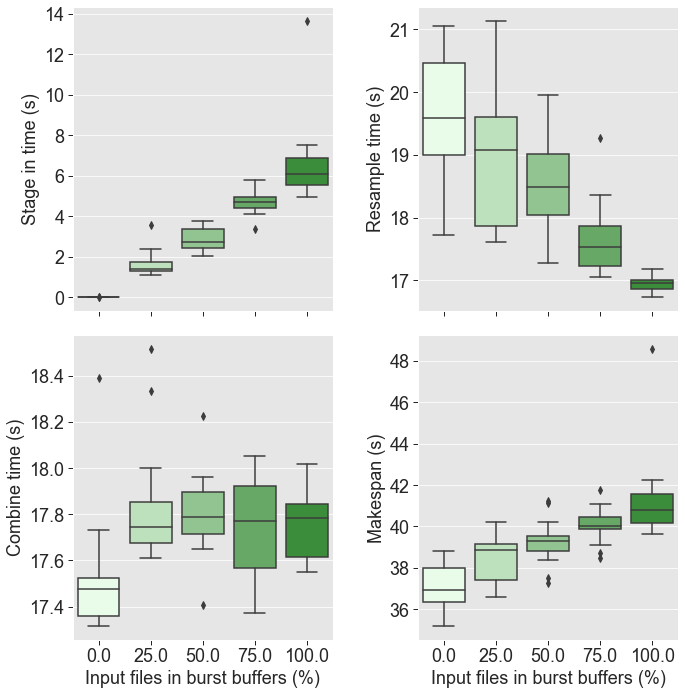

In [17]:
temp_df = df_swarp[is_FITS & is_PRIVATE]
temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

xlabel='Input files in burst buffers (%)'

def plot_boxplot_all_tasks(df, output, print_dots=False):

    with sns.light_palette("green"):

        #print(test.info())

        f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
        f.patch.set_alpha(0)

        g1 = sns.boxplot(x="BB_NB_FILES", y="STAGEIN_TIME_S", data=df, ax=axes[0,0])
        if print_dots:
            g1 = sns.swarmplot(x="BB_NB_FILES", y="STAGEIN_TIME_S", data=df, color=".25", ax=axes[0,0])
        g1.set(xlabel='', ylabel='Stage in time (s)')

        g2 = sns.boxplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", data=df, ax=axes[0,1])
        if print_dots:
            g2 = sns.swarmplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", data=df, color=".25", ax=axes[0,1])
        g2.set(xlabel='', ylabel='Resample time (s)')

        g3 = sns.boxplot(x="BB_NB_FILES", y="COMBINE_TIME_S", data=df, ax=axes[1,0])
        if print_dots:
            g3 = sns.swarmplot(x="BB_NB_FILES", y="COMBINE_TIME_S", data=df, color=".25", ax=axes[1,0])
        g3.set(xlabel=xlabel, ylabel='Combine time (s)')

        g4 = sns.boxplot(x="BB_NB_FILES", y="MAKESPAN_S", data=df, ax=axes[1,1])
        if print_dots:
            g4 = sns.swarmplot(x="BB_NB_FILES", y="MAKESPAN_S", data=df, color=".25", ax=axes[1,1])
        g4.set(xlabel=xlabel, ylabel='Makespan (s)')

        plt.tight_layout()
        plt.savefig(OUTPUT+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
        plt.savefig(OUTPUT+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
        plt.show()
        #plt.close() 

plot_boxplot_all_tasks(temp_df, output="swarp-box-fits-private-1w-32c")


Plot boxplot task: STAGEIN_TIME_S


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


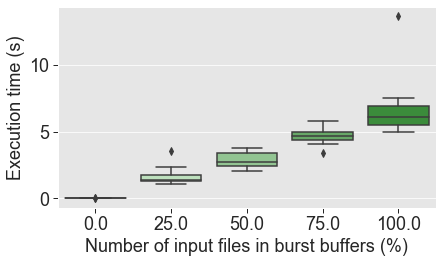

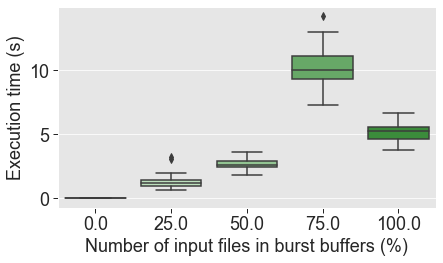

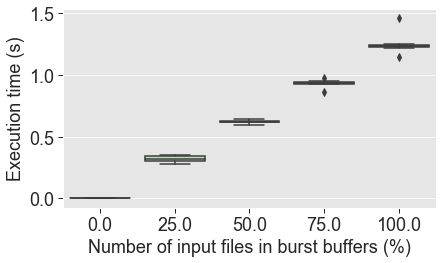

Plot boxplot task: RESAMPLE_TIME_S


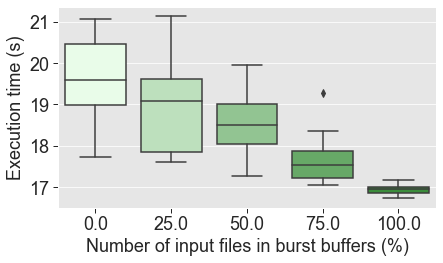

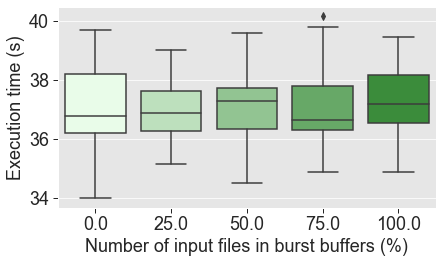

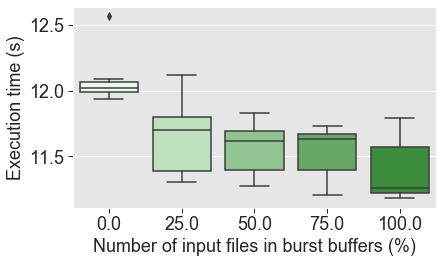

Plot boxplot task: COMBINE_TIME_S


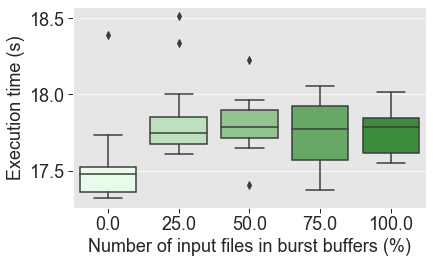

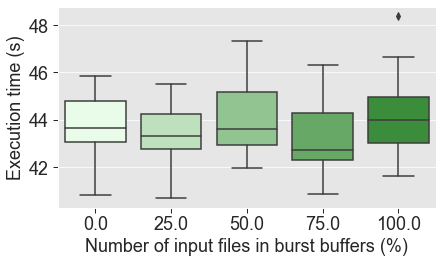

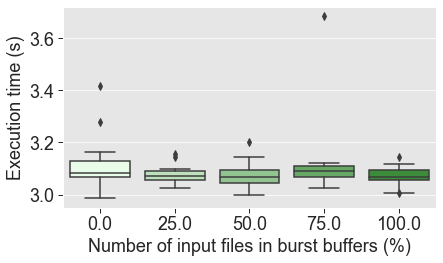

Plot boxplot task: MAKESPAN_S


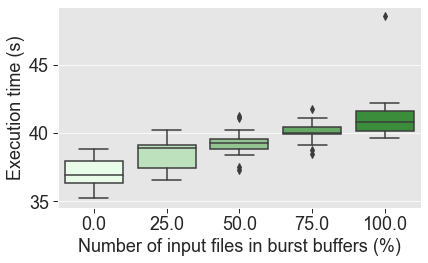

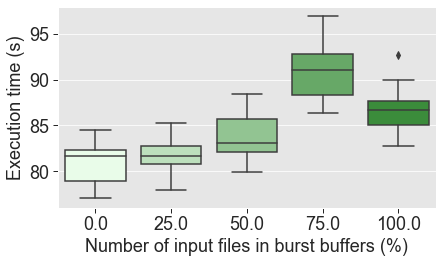

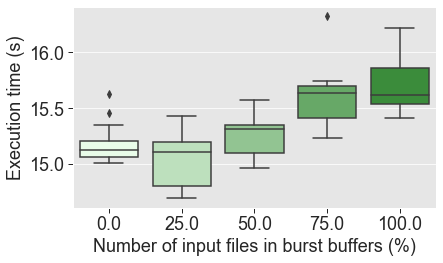

In [18]:
temp_df = df_swarp[is_FITS & is_PRIVATE]
temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

temp_df_striped = df_swarp[is_FITS & is_STRIPED]
temp_df_striped.BB_NB_FILES = (temp_df_striped.BB_NB_FILES*100)/32

temp_df_summit = df_swarp[is_FITS & is_ONNODE]
temp_df_summit.BB_NB_FILES = (temp_df_summit.BB_NB_FILES*100)/32

def plot_boxplot_per_task(df, col, output, print_dots=False):
    xlabel='Number of input files in burst buffers (%)'
#     legend_label=['Private', 'Striped']
    name = col.split("_")[0].lower()
        
    with sns.light_palette("green"):

        #print(test.info())

        f = plt.figure(figsize=fig_size_rect)
        f.patch.set_alpha(0)

        g1 = sns.boxplot(x="BB_NB_FILES", y=col, data=df)
        if print_dots:
            g1 = sns.swarmplot(x="BB_NB_FILES", y=col, data=df, color=".25")
        g1.set(xlabel=xlabel, ylabel='Execution time (s)')

        plt.tight_layout()
        plt.savefig(OUTPUT+'swarp-box-'+name+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
        plt.savefig(OUTPUT+'swarp-box-'+name+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
        plt.show()

for task in tasks:
    print("Plot boxplot task:", task)
    plot_boxplot_per_task(temp_df, task, output="-fits-private-1w-32c")
    plot_boxplot_per_task(temp_df_striped, task, output="-fits-striped-1w-32c")
    plot_boxplot_per_task(temp_df_summit, task, output="-fits-onnode-1w-32c")


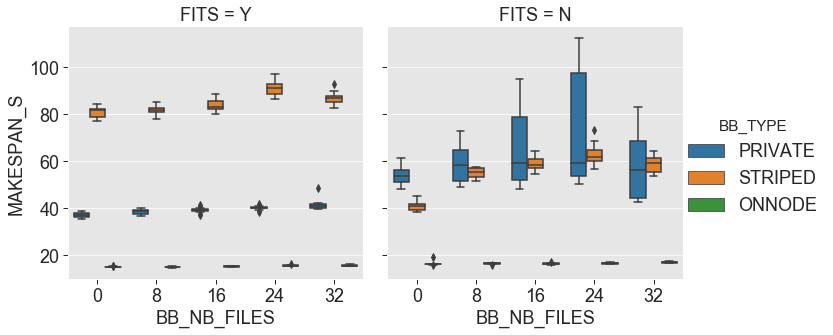

In [19]:
g = sns.catplot(x="BB_NB_FILES", y="MAKESPAN_S", hue="BB_TYPE", col="FITS", data=df_swarp, kind="box")

In [20]:
xlabel_input='Input files in burst buffers (%)'
legend_bb=['Private (Cori)', 'Striped (Cori)', 'On-node (Summit)']

FITS


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


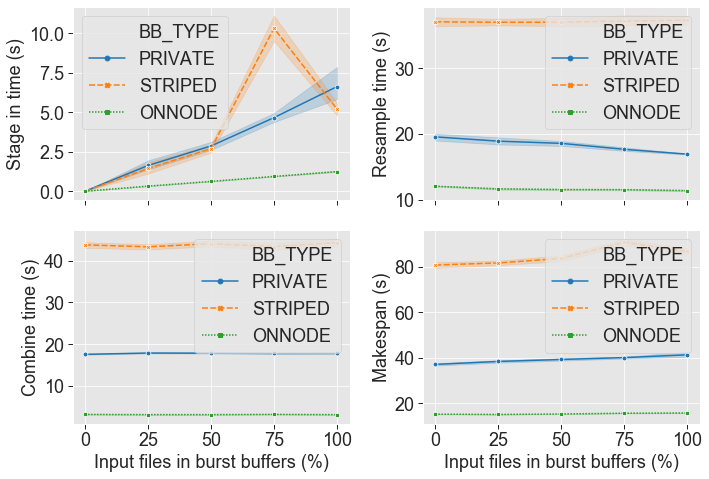

In [21]:
print("FITS")
temp_df = df_swarp[is_FITS]
temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

def plot_lineplot_all_tasks_bbtype(df, output, label, legend_label):
    
    #print(test.info())

    f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
    f.patch.set_alpha(0)

    g2 = sns.lineplot(x="BB_NB_FILES", y="STAGEIN_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=df, ax=axes[0,0],markers=True)
    g2.legend(title='')
    g2.set(xlabel=label[0], ylabel='Stage in time (s)')

    g3 = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=df, ax=axes[0,1],markers=True)
    #g3.legend_.remove()
    g3.legend(title='')
    g3.set(xlabel=label[0], ylabel='Resample time (s)')

    g4 = sns.lineplot(x="BB_NB_FILES", y="COMBINE_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=df, ax=axes[1,0],markers=True)
    #g4.legend_.remove()
    g4.legend(title='')
    g4.set(xlabel=label[0], ylabel='Combine time (s)')

    g1 = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", hue="BB_TYPE", style="BB_TYPE", data=df, ax=axes[1,1],markers=True)
    #g1.legend_.remove()
    g1.legend(title='')
    g1.set(xlabel=label[0], ylabel='Makespan (s)')

    plt.tight_layout()
    plt.savefig(OUTPUT+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    #plt.close() 

plot_lineplot_all_tasks_bbtype(temp_df, "swarp-line-fits-1w-32c", label=[xlabel_input, ''], legend_label=legend_bb)


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Plot line task: STAGEIN_TIME_S


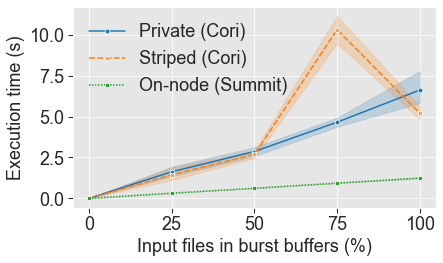

Plot line task: RESAMPLE_TIME_S


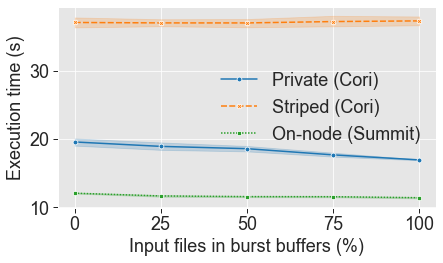

Plot line task: COMBINE_TIME_S


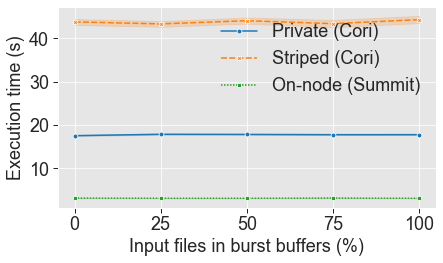

Plot line task: MAKESPAN_S


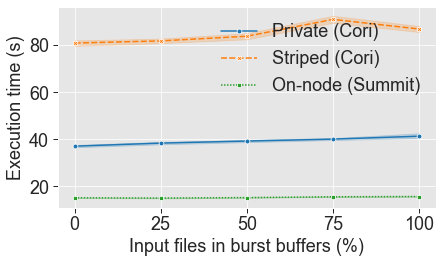

In [35]:
temp_df = df_swarp[is_FITS]
temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

def plot_lineplot_per_task_bbtype(df, col, output, xlabel, legend, loc='upper left'):
    name = col.split("_")[0].lower()

    f = plt.figure(figsize=fig_size_rect)
    f.patch.set_alpha(0)
    
    g = sns.lineplot(x="BB_NB_FILES", y=col, hue="BB_TYPE", style="BB_TYPE", data=df,markers=True)
    g.legend(title='', labels=legend, frameon=False)
    g.set(xlabel=xlabel, ylabel='Execution time (s)', xticks=df.BB_NB_FILES.unique())

    plt.tight_layout()
    plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()

loc = ['upper left', 'upper right', 'upper left', 'center left']
for i,task in enumerate(tasks):
    print("Plot line task:", task)
    plot_lineplot_per_task_bbtype(temp_df, task, output="-fits-1w-32c", xlabel=xlabel_input, legend=legend_bb, loc=loc[i])


NOFITS
Plot line task: STAGEIN_TIME_S


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


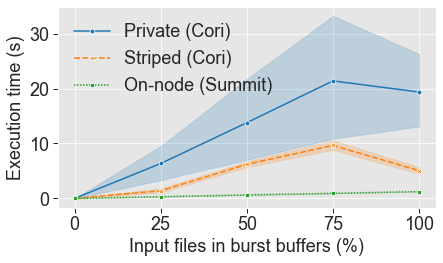

Plot line task: RESAMPLE_TIME_S


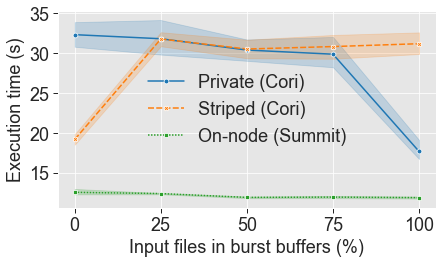

Plot line task: COMBINE_TIME_S


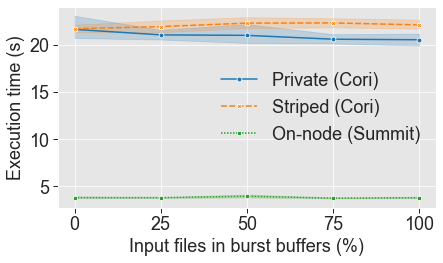

Plot line task: MAKESPAN_S


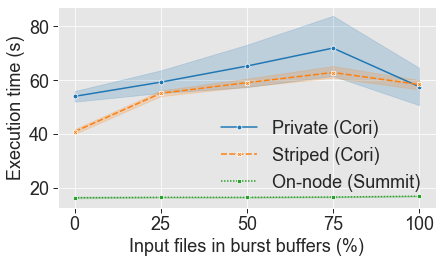

In [34]:
print("NOFITS")
temp_df = df_swarp[~is_FITS]
temp_df.BB_NB_FILES = (temp_df.BB_NB_FILES*100)/32

loc = ['upper left', 'upper right', 'upper left', 'center left']
for i,task in enumerate(tasks):
    print("Plot line task:", task)
    plot_lineplot_per_task_bbtype(temp_df, task, output="-nofits-1w-32c", xlabel=xlabel_input, legend=legend_bb, loc=loc[i])


In [24]:
#g = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", hue="BB_TYPE", style="BB_TYPE", data=df_swarp[~is_FITS])

In [25]:
ylabel='Execution time (s)'
legend_label=['Burst Buffers', 'Parallel File System']

PRIVATE


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

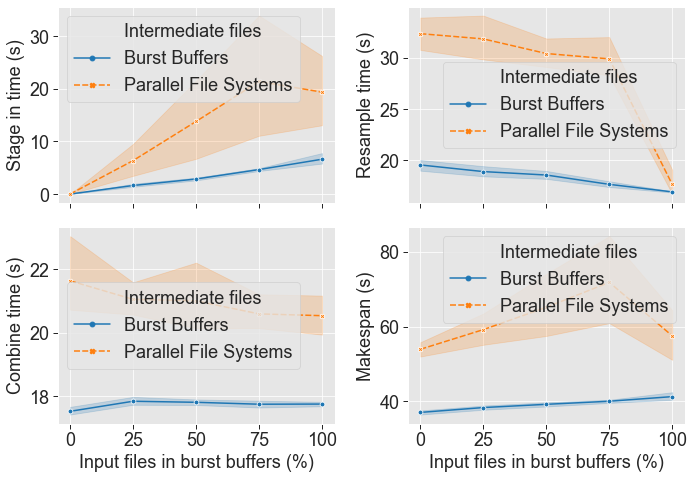

In [26]:
print("PRIVATE")
temp_df_private = df_swarp[is_PRIVATE]
temp_df_private.BB_NB_FILES = (temp_df_private.BB_NB_FILES*100)/32
temp_df_private["FITS"]= temp_df_private["FITS"].str.replace("Y", "Burst Buffers", case = False)
temp_df_private["FITS"]= temp_df_private["FITS"].str.replace("N", "Parallel File Systems", case = False)
temp_df_private.rename(columns={'FITS':'Intermediate files'}, inplace=True)

def plot_lineplot_all_tasks_fits(df, output, label, legend_label, loc=['upper left', 'upper left', 'upper left', 'upper left']):
    
    f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
    f.patch.set_alpha(0)

    g2 = sns.lineplot(x="BB_NB_FILES", y="STAGEIN_TIME_S", hue='Intermediate files', style='Intermediate files', data=df, ax=axes[0,0],markers=True)
    g2.set(xlabel=xlabel, ylabel='Stage in time (s)')

    g3 = sns.lineplot(x="BB_NB_FILES", y="RESAMPLE_TIME_S", hue='Intermediate files', style='Intermediate files', data=df, ax=axes[0,1],markers=True)
    g3.set(xlabel=xlabel, ylabel='Resample time (s)')

    g4 = sns.lineplot(x="BB_NB_FILES", y="COMBINE_TIME_S", hue='Intermediate files', style='Intermediate files', data=df, ax=axes[1,0],markers=True)
    g4.set(xlabel=xlabel, ylabel='Combine time (s)')

    g1 = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", hue='Intermediate files', style='Intermediate files', data=df, ax=axes[1,1],markers=True)
    g1.set(xlabel=xlabel, ylabel='Makespan (s)')

    plt.tight_layout()
    plt.savefig(OUTPUT+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()
    plt.close() 

loc=['upper left', 'upper right', 'center left', 'upper right']

plot_lineplot_all_tasks_fits(temp_df_private, "swarp-line-private-1w-32c", label=[xlabel_input, ylabel], legend_label=legend_label, loc=loc)


STRIPED


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

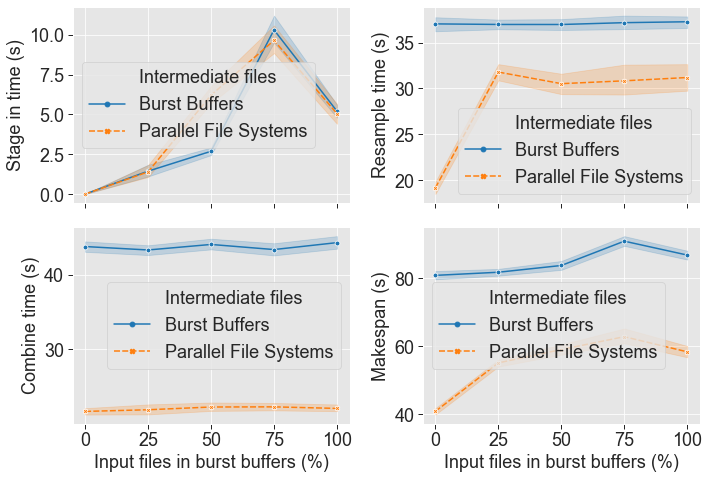

In [27]:
print("STRIPED")
temp_df_striped = df_swarp[is_STRIPED]
temp_df_striped.BB_NB_FILES = (temp_df_striped.BB_NB_FILES*100)/32
loc=['upper left', 'lower right', 'upper left', 'lower right']
temp_df_striped["FITS"]= temp_df_striped["FITS"].str.replace("Y", "Burst Buffers", case = False)
temp_df_striped["FITS"]= temp_df_striped["FITS"].str.replace("N", "Parallel File Systems", case = False)
temp_df_striped.rename(columns={'FITS':'Intermediate files'}, inplace=True)

plot_lineplot_all_tasks_fits(temp_df_striped, "swarp-line-striped-1w-32c", label=[xlabel, ylabel], legend_label=legend_label,loc=loc)


ONNODES


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

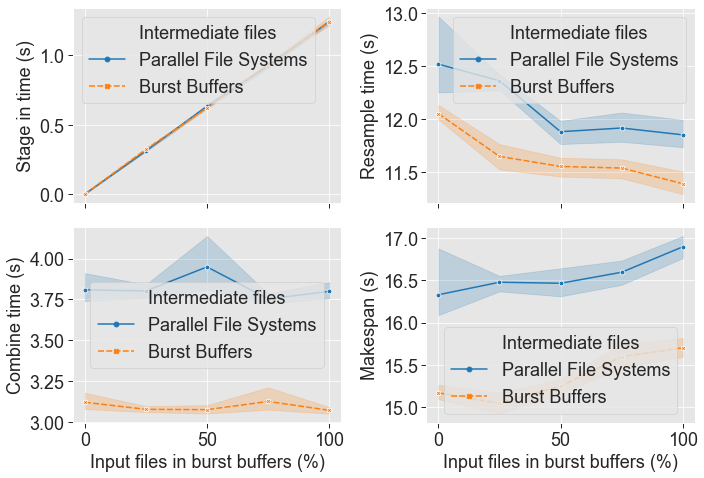

In [28]:
print("ONNODES")
temp_df_summit = df_swarp[is_ONNODE]
temp_df_summit.BB_NB_FILES = (temp_df_summit.BB_NB_FILES*100)/32
temp_df_summit["FITS"]= temp_df_summit["FITS"].str.replace("Y", "Burst Buffers", case = False)
temp_df_summit["FITS"]= temp_df_summit["FITS"].str.replace("N", "Parallel File Systems", case = False)
temp_df_summit.rename(columns={'FITS':'Intermediate files'}, inplace=True)

loc=['upper left', 'center right', 'upper left', 'lower right']

plot_lineplot_all_tasks_fits(temp_df_summit, "swarp-line-onnodes-1w-32c", label=[xlabel, ylabel], legend_label=legend_label, loc=loc)


Plot line fits task: STAGEIN_TIME_S


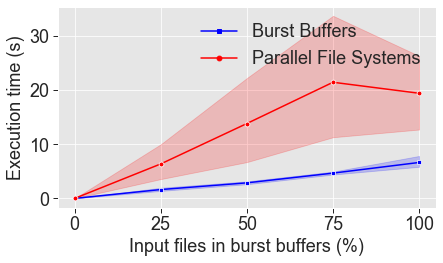

Plot line fits task: RESAMPLE_TIME_S


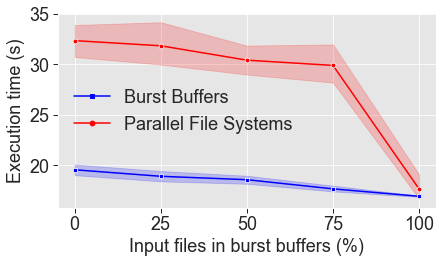

Plot line fits task: COMBINE_TIME_S


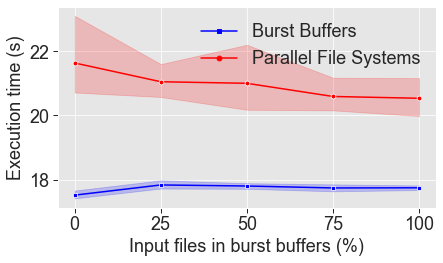

Plot line fits task: MAKESPAN_S


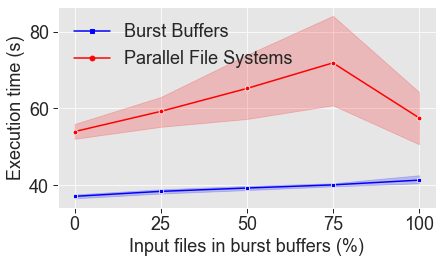

Plot line fits task: STAGEIN_TIME_S


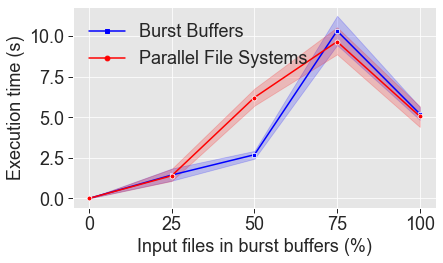

Plot line fits task: RESAMPLE_TIME_S


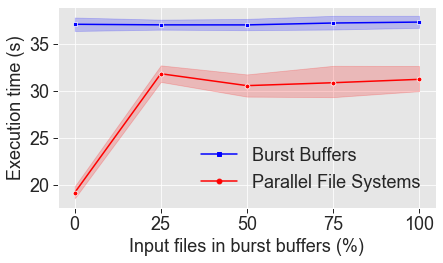

Plot line fits task: COMBINE_TIME_S


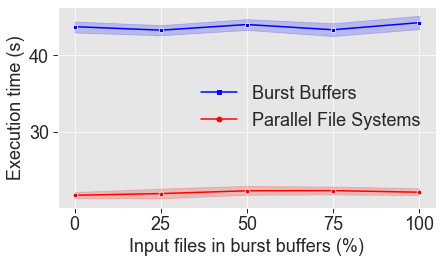

Plot line fits task: MAKESPAN_S


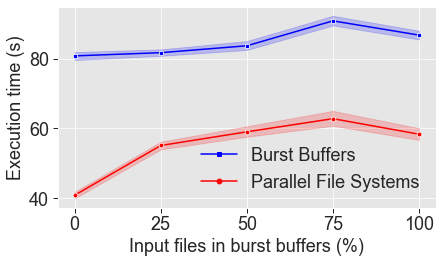

Plot line fits task: STAGEIN_TIME_S


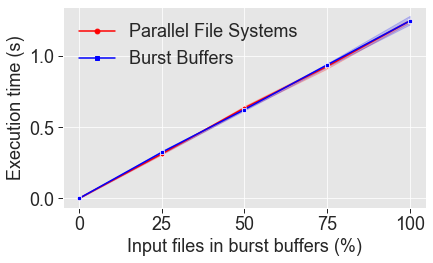

Plot line fits task: RESAMPLE_TIME_S


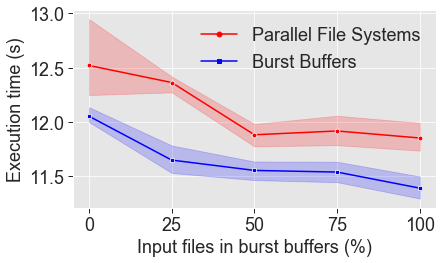

Plot line fits task: COMBINE_TIME_S


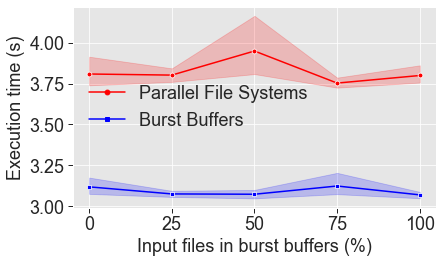

Plot line fits task: MAKESPAN_S


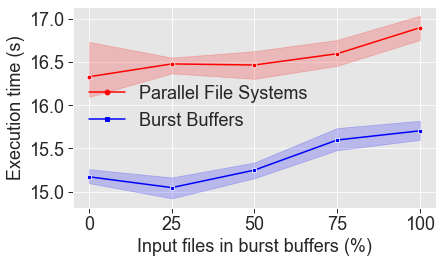

In [29]:
def plot_lineplot_per_task_fits(df, col, output, xlab, ylab, legend, loc='upper left'):

    name = col.split("_")[0].lower()

    f = plt.figure(figsize=fig_size_rect)
    f.patch.set_alpha(0)
    
    g = sns.lineplot(x="BB_NB_FILES", 
                     y=col, 
                     hue='Intermediate files', 
                     style='Intermediate files', 
                     data=df, 
                     dashes=False,
                     markers={'Parallel File Systems': 'o', 'Burst Buffers': 's'}, 
                     palette={'Parallel File Systems': 'r', 'Burst Buffers': 'b'},
    )
    g.set(xlabel=xlabel, ylabel=ylabel, xticks=df.BB_NB_FILES.unique())
    handles, labels = g.get_legend_handles_labels()
    g.legend(title='', ncol=1, frameon=False, handles=handles[1:], labels=labels[1:])
    
    plt.tight_layout()
    plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+'swarp-line-'+name+output+'.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()

ylabel='Execution time (s)'
loc=['upper left', 'lower right', 'upper right', 'lower right']
for i,task in enumerate(tasks):
    print("Plot line fits task:", task)
    plot_lineplot_per_task_fits(temp_df_private, task, output="-fits-private-1w-32c", xlab=xlabel, ylab=ylabel, legend=legend_label, loc=loc[i])
    
for i,task in enumerate(tasks):
    print("Plot line fits task:", task)
    plot_lineplot_per_task_fits(temp_df_striped, task, output="-fits-striped-1w-32c", xlab=xlabel, ylab=ylabel, legend=legend_label, loc=loc[i])
    
for i,task in enumerate(tasks):
    print("Plot line fits task:", task)
    plot_lineplot_per_task_fits(temp_df_summit, task, output="-fits-onnode-1w-32c", xlab=xlabel, ylab=ylabel, legend=legend_label, loc=loc[i])
    

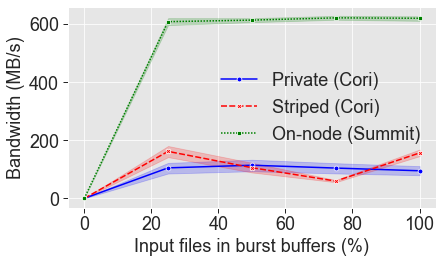

In [31]:
# agg_swarp = df_swarp.groupby(['ID', 'BB_NB_FILES','FITS','BB_SIZE_FILES_MB', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg({'MAKESPAN_S': 'max', 'COMBINE_TIME_S': 'max', 'RESAMPLE_TIME_S': 'max', 'STAGEIN_TIME_S': 'min'})


print_dots = True
ylabel='Bandwidth (MB/s)'


# agg_swarp['bw'] = agg_swarp['BB_SIZE_FILES_MB'] / agg_swarp['STAGEIN_TIME_S']

# bandwidth_swarp = df_swarp.groupby(['ID', 'NB_PIPELINE','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg(lambda g: g['BB_SIZE_FILES_MB'].max()/g['STAGEIN_TIME_S'].max())

#print(bandwidth_swarp)
# f, axes = plt.subplots(1, 2, figsize=(9, 4.5), sharex=True, sharey=True)
f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

df_copy = df_swarp.copy()
df_copy.BB_NB_FILES = (df_copy.BB_NB_FILES*100)/32
df_copy["BB_TYPE"] = df_copy["BB_TYPE"].str.replace("PRIVATE", 'Private (Cori)', case = False)
df_copy["BB_TYPE"] = df_copy["BB_TYPE"].str.replace("STRIPED", 'Striped (Cori)', case = False)
df_copy["BB_TYPE"] = df_copy["BB_TYPE"].str.replace("ONNODE", 'On-node (Summit)', case = False)
    
g1 = sns.lineplot(x="BB_NB_FILES", y="BANDWIDTH_MBS", data=df_copy, hue="BB_TYPE", style="BB_TYPE", markers=True, palette={'Private (Cori)': 'b', 'Striped (Cori)': 'r', 'On-node (Summit)': 'g'})
g1.set(xlabel=xlabel_input, ylabel=ylabel)

# g1.set_xscale('log')
# g1.set_xticks(agg_swarp.NB_PIPELINE.unique())
# g1.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

g1.legend(title='', labels=legend_bb, frameon=False)

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-bandwidth-1w-32c-Xf.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-bandwidth-1w-32c-Xf.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()